In [1]:
import librosa.display
import tensorflow as tf
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('Data/features_3_sec.csv')

In [3]:
df.shape

(9990, 60)

In [4]:
df['tags'] = df['filename'].str.split('.').str[1]

In [5]:
df['tags1'] = df['filename'].str.split('.').str[0]

In [6]:
df['tags'].value_counts()

00000    100
00075    100
00073    100
00072    100
00071    100
        ... 
00038     99
00032     99
00031     99
00051     99
00049     99
Name: tags, Length: 100, dtype: int64

In [7]:
df.loc[(df['tags'] == '00002') & (df['tags1'] == 'blues')]

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
20  blues.00002.0.wav   66149          0.366614         0.090509  0.152206   
21  blues.00002.1.wav   66149          0.384461         0.084645  0.167405   
22  blues.00002.2.wav   66149          0.379043         0.086581  0.176237   
23  blues.00002.3.wav   66149          0.397078         0.080919  0.177723   
24  blues.00002.4.wav   66149          0.360683         0.088624  0.183903   
25  blues.00002.5.wav   66149          0.364035         0.088116  0.152364   
26  blues.00002.6.wav   66149          0.299589         0.083030  0.170790   
27  blues.00002.7.wav   66149          0.361508         0.079471  0.190943   
28  blues.00002.8.wav   66149          0.334331         0.081312  0.196997   
29  blues.00002.9.wav   66149          0.391811         0.078529  0.187923   

     rms_var  spectral_centroid_mean  spectral_centroid_var  \
20  0.002467             1676.978191          433761.847841   
21  0.001362             1337.448514           69939.396509   
22  0.001924             1590.857591          153760.844757   
23  0.001808             1436.270424           98276.302728   
24  0.001507             1540.099772          145972.646462   
25  0.001923             1594.920885          260781.775496   
26  0.001917             1396.794527           81945.617374   
27  0.003116             1549.572759           47057.458331   
28  0.003942             1704.564643           75336.469181   
29  0.005516             1673.364389           68382.596855   

    spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc17_var  \
20              1794.856236            56792.982500  ...   44.652466   
21              1658.057449            50969.919105  ...   65.734543   
22              1779.645051            79475.879079  ...   44.407555   
23              1690.135527            55831.185712  ...   49.576012   
24              1726.643189            65111.550643  ...   34.864491   
25              1730.746723           113020.010243  ...   46.145531   
26              1517.311972            92242.679953  ...   41.892445   
27              1788.919219            45072.259662  ...   39.133656   
28              1880.313683            46849.145321  ...   58.522827   
29              1893.572151            47306.278227  ...   24.065565   

    mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  \
20    -2.819872   50.686920    -2.062507   38.493343    -4.214690   23.373898   
21    -0.409954   47.267921    -1.283557   51.049812    -0.642756   27.588282   
22    -3.105310   40.462624    -4.471606   46.745087    -1.416849   35.118946   
23     2.942567   28.540144    -0.360661   54.554077    -1.046457   27.857132   
24    -2.013198   24.143799    -4.399901   32.495110    -3.156466   38.718266   
25    -2.628009   53.689621    -2.401809   59.490814    -0.967632   32.147289   
26    -6.356915   48.576363    -7.920033   24.511488    -0.412127   22.517632   
27     0.860312   79.191307    -5.330613   42.226936     1.075333   22.927328   
28     2.397915   65.363472    -6.671227   38.077599    -2.200269   30.644648   
29     2.025056   20.160931    -6.556604   29.323061    -1.891574   35.834270   

    label   tags  tags1  
20  blues  00002  blues  
21  blues  00002  blues  
22  blues  00002  blues  
23  blues  00002  blues  
24  blues  00002  blues  
25  blues  00002  blues  
26  blues  00002  blues  
27  blues  00002  blues  
28  blues  00002  blues  
29  blues  00002  blues  

[10 rows x 62 columns]

In [8]:
save_for_analysis = df.loc[(df['tags'] == '00002') & (df['tags1'] == 'blues')]['chroma_stft_mean']

# Lets drop some unecessary features.

In [9]:
df.drop(['filename','tags'],axis =1 ,inplace = True)

In [10]:
df.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc17_mean  mfcc17_var  \
0           117335.771563   3714.560359  ...    -3.241280   36.488243   
1            65671.875673   3869.682242  ...    -6.055294   40.677654   
2            75124.921716   3997.639160  ...    -1.768610   28.348579   
3            82913.639269   3568.300218  ...    -3.841155   28.337118   
4            60204.020268   3469.992864  ...     0.664582   45.880913   

   mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  \
0     0.722209   38.099152    -5.050335   33.618073    -0.243027   43.771767   
1     0.159015   51.264091    -2.837699   97.030830     5.784063   59.943081   
2     2.378768   45.717648    -1.938424   53.050835     2.517375   33.105122   
3     1.218588   34.770935    -3.580352   50.836224     3.630866   32.023678   
4     1.689446   51.363583    -3.392489   26.738789     0.536961   29.146694   

   label  tags1  
0  blues  blues  
1  blues  blues  
2  blues  blues  
3  blues  blues  
4  blues  blues  

[5 rows x 60 columns]

# Let's visualize the dataset and understand our data better.

There are 8 main genres with 1000 sub-classes per 
genre, such as Electronic, Experimental, Folk, Hip-hop, Instrumental, International, 
Pop, Rock. And most of them are with sampling rate of 44,100 Hz, bit rate 320 kb/s, 
and in stereo. The GTZAN dataset consists of 1000 audio tracks of 30 seconds long, 
which contains 10 genres with 100 tracks per genre. All tracks are 22,050Hz, Mono 
16-bit audio files in .wav format (Sturm, 2013).

In [11]:
# It returns 
# y : np.ndarray [shape=(n,) or (..., n)]
#    audio time series. Multi-channel is supported.
#sr : number > 0 [scalar]
#   sampling rate of ``y``

rec_file = 'Data/genres_original/blues/blues.00002.wav'
data,sr = librosa.load(rec_file)

In [12]:
librosa.load(rec_file,sr=44100) # Opening in sample rate of 44100

(array([ 0.01888484,  0.03553968,  0.04781976, ..., -0.12216461,
        -0.12027903, -0.06499076], dtype=float32),
 44100)

In [13]:
import IPython
IPython.display.Audio(data,rate = sr)

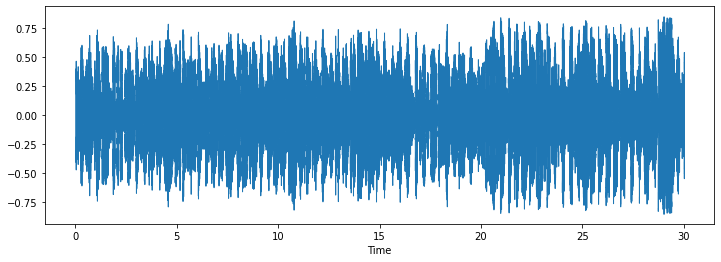

In [14]:
import matplotlib.pyplot as plt 
plt.figure(figsize = (12,4))
librosa.display.waveshow(data)

# Lets Create A spectogram

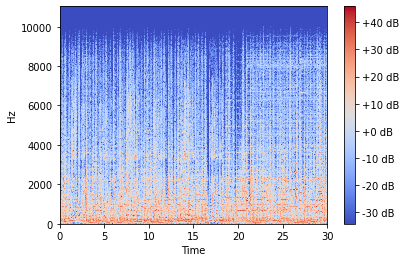

In [15]:
# By converting to decibels (dB) the scale becomes logarithmic. 
#This limits the numerical range, to something like 0-120 dB instead. 
#The intensity of colors when this is plotted corresponds more closely to what we hear than if one used a linear scale.
n_fft = 2048
hop_length = 512
stft = librosa.stft(data,n_fft=2048,hop_length = 512)
stft_db = librosa.amplitude_to_db(abs(stft))
librosa.display.specshow(data = stft_db,sr = 22050, x_axis = 'time', y_axis = 'hz')
plt.colorbar(format="%+2.f dB")

The vertical axis represents frequencies (from 0 to 10kHz), and the horizontal axis represents the time of the clip.

# Rolloff - fequency
Its a frequency below which a specified percentage of the total spectral lies / 85%


C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\2011741563.py:2: FutureWarning: Pass y=[ 0.02901245  0.05769897  0.03941894 ...  0.02318359 -0.0563147
 -0.11484741] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01,sr=sr)[0]


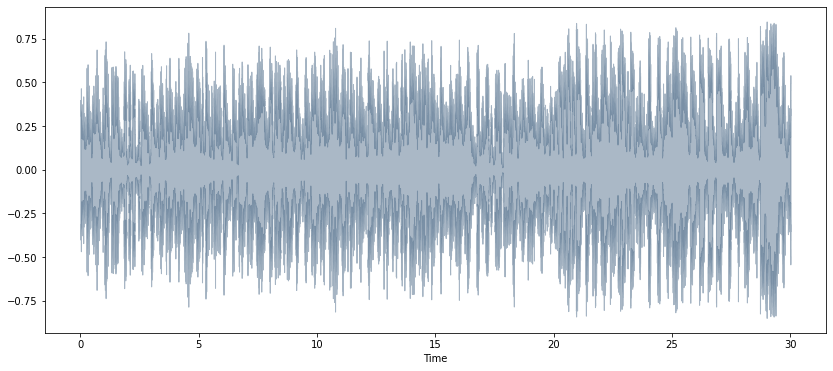

In [16]:
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01,sr=sr)[0]
plt.figure(figsize=(14,6))
librosa.display.waveshow(data,sr=sr,alpha=0.4,color = "#2B4F72")

# Chroma Feature.
It is a powerful tool for analyzing music features whose pitches can be meaningfully categorized and whose tuning approximates to the equal-tempered scale. One main property of chroma features is that they capture harmonic and melodic characteristics of music while being robust to changes in timbre and instrumentation. 

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\798472570.py:2: FutureWarning: Pass y=[ 0.01901245  0.04769897  0.02941895 ...  0.01318359 -0.0663147
 -0.12484741] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data,sr = 45600)


Text(0.5, 1.0, 'Chroma Features')

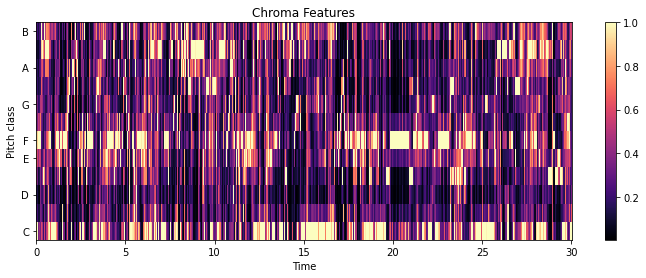

In [17]:
plt.figure(figsize = (12,4))
chroma = librosa.feature.chroma_stft(data,sr = 45600)
librosa.display.specshow(chroma,sr = sr, x_axis = 'time',y_axis = 'chroma')
plt.colorbar()
plt.title("Chroma Features")


In [18]:
chroma.mean()

0.37062144

# MFCC Extraction

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\1807376968.py:2: FutureWarning: Pass y=[ 0.01901245  0.04769897  0.02941895 ...  0.01318359 -0.0663147
 -0.12484741] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(data,n_fft =n_fft,hop_length = hop_length,n_mfcc=13)


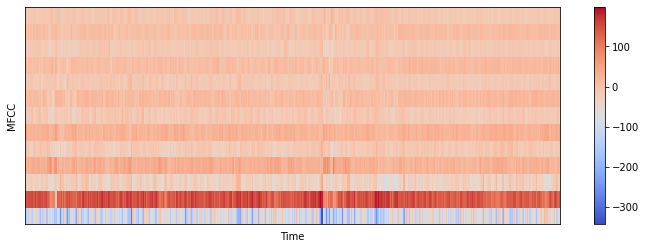

In [19]:
plt.figure(figsize = (12,4))
mfcc = librosa.feature.mfcc(data,n_fft =n_fft,hop_length = hop_length,n_mfcc=13)
librosa.display.specshow(mfcc,sr = sr,hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()

In [384]:
import os
path = 'Data\genres_original'
filenames_all = []
labels = []
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(path)):    
    if dirpath != path:
        filenames_all.append(filenames)
        labels.append(len(filenames_all[i-1])*[i-1])


In [398]:
len(labels)

10

In [403]:
i = 0
j = 0
filenames_all[i][j]

'blues.00000.wav'

In [441]:
dataset_path = 'Data/genres_original'
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:
            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)

            # process all audio files in genre sub-dir
            for f in filenames:

        # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                print(f)

blues.00000.wav
blues.00001.wav
blues.00002.wav
blues.00003.wav
blues.00004.wav
blues.00005.wav
blues.00006.wav
blues.00007.wav
blues.00008.wav
blues.00009.wav
blues.00010.wav
blues.00011.wav
blues.00012.wav
blues.00013.wav
blues.00014.wav
blues.00015.wav
blues.00016.wav
blues.00017.wav
blues.00018.wav
blues.00019.wav
blues.00020.wav
blues.00021.wav
blues.00022.wav
blues.00023.wav
blues.00024.wav
blues.00025.wav
blues.00026.wav
blues.00027.wav
blues.00028.wav
blues.00029.wav
blues.00030.wav
blues.00031.wav
blues.00032.wav
blues.00033.wav
blues.00034.wav
blues.00035.wav
blues.00036.wav
blues.00037.wav
blues.00038.wav
blues.00039.wav
blues.00040.wav
blues.00041.wav
blues.00042.wav
blues.00043.wav
blues.00044.wav
blues.00045.wav
blues.00046.wav
blues.00047.wav
blues.00048.wav
blues.00049.wav
blues.00050.wav
blues.00051.wav
blues.00052.wav
blues.00053.wav
blues.00054.wav
blues.00055.wav
blues.00056.wav
blues.00057.wav
blues.00058.wav
blues.00059.wav
blues.00060.wav
blues.00061.wav
blues.00

jazz.00010.wav
jazz.00011.wav
jazz.00012.wav
jazz.00013.wav
jazz.00014.wav
jazz.00015.wav
jazz.00016.wav
jazz.00017.wav
jazz.00018.wav
jazz.00019.wav
jazz.00020.wav
jazz.00021.wav
jazz.00022.wav
jazz.00023.wav
jazz.00024.wav
jazz.00025.wav
jazz.00026.wav
jazz.00027.wav
jazz.00028.wav
jazz.00029.wav
jazz.00030.wav
jazz.00031.wav
jazz.00032.wav
jazz.00033.wav
jazz.00034.wav
jazz.00035.wav
jazz.00036.wav
jazz.00037.wav
jazz.00038.wav
jazz.00039.wav
jazz.00040.wav
jazz.00041.wav
jazz.00042.wav
jazz.00043.wav
jazz.00044.wav
jazz.00045.wav
jazz.00046.wav
jazz.00047.wav
jazz.00048.wav
jazz.00049.wav
jazz.00050.wav
jazz.00051.wav
jazz.00052.wav
jazz.00053.wav
jazz.00055.wav
jazz.00056.wav
jazz.00057.wav
jazz.00058.wav
jazz.00059.wav
jazz.00060.wav
jazz.00061.wav
jazz.00062.wav
jazz.00063.wav
jazz.00064.wav
jazz.00065.wav
jazz.00066.wav
jazz.00067.wav
jazz.00068.wav
jazz.00069.wav
jazz.00070.wav
jazz.00071.wav
jazz.00072.wav
jazz.00073.wav
jazz.00074.wav
jazz.00075.wav
jazz.00076.wav
jazz.00077

In [431]:
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:
            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)

            # process all audio files in genre sub-dir
            for f in filenames:

        # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [432]:
save_mfcc(dataset_path = 'Data/genres_original',json_path = 'data.json')

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.00732422 0.01660156 0.00762939 ... 0.00918579 0.03964233 0.09030151], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.06256104  0.02435303 -0.00405884 ...  0.06338501  0.12329102
  0.16189575], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.17449951  0.17346191  0.15603638 ... -0.07949829  0.02407837
  0.02468872], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.04547119  0.02957153  0.00296021 ... -0.02020264 -0.00274658
  0.00723267], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02429199 -0.02975464 -0.00961304 ...  0.03231812  0.03237915
  0.03375244], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.03588867  0.03689575  0.03747559 ...  0.0586853  -0.04284668
 -0.11941528], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.11160278  0.00970459 -0.03823853 ...  0.05383301  0.06213379
  0.040802  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.04141235  0.02999878 -0.0062561  ... -0.03189087 -0.03521729
 -0.03820801], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.034729   -0.02868652 -0.02206421 ... -0.00680542 -0.0177002
 -0.02374268], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.07705688  0.11590576  0.09234619 ... -0.02471924 -0.02453613
 -0.02209473], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01965332 -0.01748657 -0.01483154 ...  0.0814209   0.08242798
  0.08093262], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.07897949  0.08200073  0.08267212 ...  0.02166748 -0.00170898
 -0.0289917 ], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.10144043  0.16815186  0.14266968 ... -0.00762939 -0.00299072
  0.00073242], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00375366  0.00726318  0.01028442 ... -0.03735352 -0.04751587
 -0.04800415], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03952026 -0.03216553 -0.03231812 ... -0.04968262 -0.04989624
 -0.05795288], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.04229736  0.04202271  0.04974365 ...  0.01416016 -0.0012207
 -0.01751709], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02844238 -0.03198242 -0.03405762 ...  0.11465454  0.12338257
  0.14343262], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.0005188   0.00067139 -0.00146484 ...  0.03097534  0.03652954
  0.04553223], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02703857 -0.02972412 -0.03411865 ...  0.02035522  0.0178833
  0.00201416], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01040649 -0.0015564   0.01870728 ...  0.05136108  0.0480957
  0.04754639], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.05108643 0.05511475 0.05395508 ... 0.23620605 0.22979736 0.22210693], sr=22050 as keyword args

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00836182 -0.01040649 -0.01641846 ...  0.18234253  0.14883423
  0.184021  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.18869019 0.19281006 0.23617554 ... 0.13623047 0.1465149  0.14233398], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.12139893  0.12982178  0.1381836  ... -0.20037842 -0.19619751
 -0.1927185 ], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.02264404  0.02160645  0.0211792  ... -0.06347656 -0.07214355
 -0.07550049], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.07775879 -0.07366943 -0.06903076 ... -0.01821899  0.00289917
  0.01785278], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01089478 -0.01052856 -0.00549316 ... -0.02676392 -0.06311035
 -0.08627319], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.03710938  0.07446289  0.07992554 ... -0.01263428 -0.01483154
  0.02508545], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.0826416   0.1199646   0.11245728 ...  0.02978516  0.00717163
 -0.0496521 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.07818604 -0.10879517 -0.14416504 ...  0.0774231   0.07345581
  0.06048584], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.04925537 0.05923462 0.05993652 ... 0.05761719 0.03924561 0.0022583 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.10806274 -0.15075684 -0.17327881 ...  0.17364502  0.1643982
  0.20370483], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.1685791  0.11795044 0.15774536 ... 0.1078186  0.10971069 0.11154175], sr=22050 as keyword args. From

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.3059082  -0.33718872 -0.33145142 ... -0.01867676  0.04486084
  0.03982544], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00387573 -0.02301025 -0.00744629 ... -0.07632446 -0.08181763
 -0.12353516], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.01705933  0.03436279  0.03353882 ... -0.11303711 -0.11856079
 -0.10284424], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.21868896  0.22766113  0.23144531 ... -0.03366089 -0.00036621
  0.01364136], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00701904 -0.04226685 -0.05432129 ...  0.08462524  0.097229
  0.08102417], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.04434204  0.00631714 -0.03088379 ...  0.03121948  0.00592041
 -0.01144409], sr=22050 as keywo

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.16659546 -0.23223877 -0.2239685  ... -0.0859375   0.10440063
  0.13934326], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.07769775  0.13952637  0.19616699 ... -0.01757812 -0.04388428
 -0.03057861], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00387573 -0.01947021 -0.08288574 ... -0.19299316 -0.17196655
 -0.1729126 ], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03796387 -0.01287842  0.02236938 ...  0.0965271   0.08496094
  0.06243896], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02722168 -0.13253784 -0.13690186 ... -0.10635376 -0.09182739
 -0.019104  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.07894897  0.13638306  0.13336182 ... -0.04534912 -0.01550293
  0.01126099], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03820801 -0.06240845 -0.06326294 ... -0.12713623 -0.1109314
 -0.08566284], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.07141113 -0.0559082  -0.00762939 ... -0.03018188 -0.09841919
 -0.13568115], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.11932373  0.25878906 -0.08468628 ...  0.05688477  0.03302002
 -0.03213501], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.3545227  -0.33203125 -0.3256836  ...  0.01873779  0.10955811
  0.16467285], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.15841675  0.15988159  0.17980957 ... -0.19335938 -0.0713501
  0.02429199], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.5245056  -0.81640625 -0.5826111  ... -0.3510437  -0.15774536
 -0.01654053], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.19869995 -0.2543335  -0.27563477 ... -0.15536499  0.36819458
  0.4567871 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.05645752  0.17404175  0.4855957  ... -0.55636597 -0.6687012
 -0.460083  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.1008606   0.21081543  0.35739136 ... -0.12515259 -0.32626343
 -0.28329468], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.42645264 0.37609863 0.2515869  ... 0.10296631 0.10803223 0.14916992], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00338745  0.15115356  0.18841553 ... -0.01400757  0.11529541
 -0.03259277], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.16564941  0.07318115  0.06259155 ...  0.14596558  0.04620361
 -0.08444214], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.08953857 -0.04190063 -0.0072937  ... -0.10952759 -0.0932312
 -0.08233643], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.07452393 -0.06439209 -0.05160522 ... -0.12966919 -0.09317017
 -0.07006836], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.05654907 -0.03192139 -0.02276611 ... -0.10586548 -0.12615967
 -0.14874268], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00067139  0.00024414  0.0007019  ... -0.08828735 -0.09042358
 -0.09207153], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.09356689 -0.09533691 -0.09637451 ... -0.03329468 -0.02883911
 -0.01773071], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.04281616  0.06796265  0.06079102 ... -0.05993652 -0.06488037
 -0.07180786], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.06954956  0.11352539  0.10494995 ... -0.13024902 -0.11193848
 -0.11761475], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.1409607  -0.16903687 -0.20333862 ...  0.20141602  0.27444458
  0.36761475], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.387146   0.37072754 0.3864441  ... 0.34152222 0.3209839  0.2778015 ], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01272583  0.0065918   0.02261353 ... -0.00366211 -0.01651001
 -0.0234375 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03033447 -0.03652954 -0.04067993 ... -0.02386475 -0.0255127
 -0.0262146 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01519775 -0.0246582  -0.01455688 ... -0.0428772  -0.04528809
 -0.04660034], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.03231812  0.03012085  0.02822876 ... -0.00466919 -0.00891113
 -0.01361084], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01495361 -0.01242065 -0.01095581 ...  0.0534668   0.04763794
  0.04318237], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.04098511  0.0397644   0.03659058 ... -0.01574707 -0.01913452
 -0.01965332], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01467896 -0.01290894 -0.01119995 ...  0.01806641  0.01977539
  0.01919556], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.0151062   0.00643921 -0.00622559 ...  0.02114868  0.02728271
  0.02130127], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00823975 -0.00442505 -0.00820923 ... -0.05004883 -0.04708862
 -0.0435791 ], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.09863281 -0.09561157 -0.09655762 ...  0.03314209  0.03860474
  0.05929565], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.00698853 0.00720215 0.00360107 ... 0.0151062  0.01229858 0.0043335 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00317383 -0.00787354 -0.00701904 ...  0.00390625  0.00912476
  0.00827026], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00439453 -0.00662231 -0.00616455 ...  0.00897217  0.00888062
  0.00875854], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.00860596 0.00814819 0.00756836 ... 0.00509644 0.00576782 0.00604248], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00576782  0.00518799  0.00439453 ...  0.00115967 -0.00097656
 -0.00250244], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.0093689  -0.00854492 -0.00518799 ...  0.01107788  0.00741577
  0.00097656], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00564575  0.00817871  0.00622559 ... -0.0163269  -0.0151062
 -0.01589966], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01507568 -0.01699829 -0.01852417 ... -0.00427246 -0.00384521
 -0.00280762], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00750732 -0.00762939 -0.00738525 ... -0.00704956 -0.00494385
 -0.00366211], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.22531128 -0.1741333  -0.13241577 ... -0.01785278 -0.00393677
 -0.0128479 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03900146 -0.06982422 -0.1072998  ...  0.11148071  0.11029053
  0.10806274], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.05117798 0.04669189 0.10043335 ... 0.08227539 0.1184082  0.15423584], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.14544678  0.09237671  0.08007812 ...  0.0234375  -0.0682373
 -0.09597778], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.11508179 -0.1618042  -0.16821289 ...  0.12731934  0.09106445
  0.07876587], sr=22050 as keyword arg

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.05050659  0.03826904 -0.0296936  ...  0.07177734  0.12231445
  0.15258789], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.15661621  0.12521362  0.05157471 ... -0.05328369 -0.00402832
  0.02700806], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.04196167  0.04586792  0.04476929 ...  0.0567627   0.04296875
 -0.00018311], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-3.2653809e-03 -2.8381348e-03 -2.7770996e-03 ... -1.0070801e-03
  3.0517578e-05  8.2397461e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00131226  0.00128174  0.00131226 ... -0.00640869 -0.00836182
 -0.0100708 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01193237 -0.01379395 -0.01589966 ... -0.01281738 -0.01269531
 -0.01254272

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.0446167   0.03884888  0.03097534 ... -0.01528931  0.00140381
  0.0138855 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.02310181  0.03009033  0.0340271  ... -0.02606201 -0.01715088
 -0.00515747], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00991821  0.02468872  0.03329468 ... -0.01278687 -0.02633667
 -0.03265381], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.04122925  0.05499268  0.06512451 ... -0.05172729 -0.04248047
 -0.03237915], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.021698   -0.01089478 -0.00033569 ...  0.01547241  0.00582886
 -0.00088501], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00784302 -0.00610352  0.00137329 ...  0.00805664  0.01602173
  0.02362061], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.01657104  0.01239014  0.00897217 ... -0.00372314 -0.00799561
 -0.01193237], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01580811 -0.02020264 -0.02511597 ...  0.00262451  0.00265503
  0.00259399], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.00250244 0.00234985 0.00228882 ... 0.00134277 0.0007019  0.00024414], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00253296 -0.00500488 -0.00769043 ... -0.0769043  -0.08505249
 -0.08447266], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00949097 -0.0078125  -0.0055542  ...  0.02853394  0.02612305
  0.02304077], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.01330566  0.00405884 -0.00787354 ... -0.0098877  -0.00198364
  0.01751709], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01403809 -0.01486206 -0.01907349 ...  0.03686523  0.04333496
  0.03997803], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.03244019 0.03076172 0.03344727 ... 0.03399658 0.02420044 0.0078125 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01620483 -0.03485107 -0.0390625  ...  0.04995728  0.06100464
  0.07479858], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03091431 -0.04541016 -0.0479126  ... -0.03503418  0.00271606
 -0.003479  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01165771 -0.03646851 -0.07510376 ... -0.00909424 -0.00808716
 -0.01037598], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00039673  0.01599121  0.02667236 ...  0.09585571  0.09942627
  0.08010864], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00073242 -0.00177002 -0.00280762 ... -0.00036621 -0.00054932
 -0.00021362], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.0007019  -0.0010376  -0.0020752  ... -0.00918579 -0.01742554
 -0.0177002 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00125122  0.01803589  0.02294922 ... -0.0045166  -0.00418091
 -0.00363159], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00497437  0.00491333  0.00244141 ... -0.00299072  0.00131226
  0.00344849], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00167847 -0.0005188  -0.00067139 ... -0.01275635 -0.01477051
 -0.01596069], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01461792 -0.0116272  -0.01101685 ... -0.01361084 -0.01361084
 -0.01208496], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.11795044 -0.07003784 -0.01266479 ... -0.1473999  -0.1697998
 -0.2137146 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.25198364 -0.29507446 -0.30947876 ...  0.15127563  0.02804565
 -0.00521851], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.06539917 -0.09942627 -0.08297729 ...  0.03359985 -0.10284424
 -0.19482422], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.17272949 -0.03149414  0.07818604 ...  0.18780518  0.14013672
  0.2564392 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.18948364  0.12258911  0.16296387 ... -0.11746216 -0.24118042
 -0.17047119], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.09716797 -0.0826416  -0.18780518 ... -0.1531372  -0.17654419
 -0.18624878], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00213623 -0.02362061 -0.05178833 ... -0.10458374 -0.15020752
 -0.17999268], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.00521851 0.00061035 0.0043335  ... 0.04528809 0.05258179 0.06365967], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.07409668 0.08078003 0.08151245 ... 0.02749634 0.02444458 0.01486206], sr=22050 as keyword args. Fro

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.09390259 0.09164429 0.09054565 ... 0.1078186  0.16949463 0.24502563], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02563477 -0.289917   -0.18371582 ...  0.00839233  0.01327515
  0.00640869], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.0144043  -0.04141235 -0.02987671 ... -0.01394653 -0.02792358
 -0.01098633], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.14263916 -0.18667603 -0.2048645  ... -0.03860474 -0.02914429
 -0.01477051], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.00048828 0.01907349 0.03967285 ... 0.0848999  0.09017944 0.09347534], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.0970459   0.10369873  0.10571289 ... -0.01269531 -0.0083313
 -0.00863647], sr=22050 as keyword arg

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.1359253  -0.12463379 -0.12304688 ...  0.06100464  0.0453186
  0.05337524], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02224731 -0.0241394  -0.02676392 ...  0.08087158  0.06790161
  0.05853271], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.05328369  0.05038452  0.05105591 ... -0.03799438 -0.01635742
 -0.00057983], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00228882  0.01434326  0.02386475 ... -0.01843262 -0.01947021
 -0.02182007], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02236938 -0.02267456 -0.02462769 ...  0.03353882  0.03652954
  0.03179932], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.02304077  0.01052856  0.00720215 ... -0.06851196 -0.12472534
 -0.05172729], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.03326416  0.0302124   0.03433228 ... -0.02581787 -0.02539062
 -0.02593994], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01657104 -0.01849365 -0.03237915 ...  0.13842773  0.05578613
 -0.0256958 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.12240601 -0.09906006 -0.00726318 ... -0.05316162 -0.05841064
 -0.0632019 ], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03488159 -0.02233887 -0.00793457 ...  0.04776001  0.04443359
  0.0065918 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00897217 -0.00494385  0.00765991 ...  0.24761963  0.1637268
  0.06640625], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.06491089  0.05664062  0.0802002  ... -0.01599121 -0.03930664
 -0.03530884], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.06378174 0.04196167 0.00238037 ... 0.03961182 0.02218628 0.00375366], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01333618 -0.02462769 -0.02883911 ...  0.01080322  0.01397705
  0.01473999], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.01773071 0.01980591 0.02206421 ... 0.07003784 0.03326416 0.02023315], sr=22050 as keyword args. Fro

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.17059326 -0.17883301 -0.18640137 ... -0.0380249  -0.06985474
 -0.11453247], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00799561 -0.01971436 -0.03125    ...  0.02697754  0.03479004
  0.04147339], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.04653931  0.050354    0.05438232 ... -0.09844971 -0.09750366
 -0.09365845], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.09692383 -0.05770874 -0.05404663 ... -0.08721924 -0.08813477
 -0.10522461], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.05892944  0.06033325  0.18466187 ... -0.05426025 -0.07568359
 -0.14868164], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.15362549 -0.19631958 -0.09451294 ...  0.12896729  0.06158447
 -0.02108765], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.14498901 0.09817505 0.04269409 ... 0.07583618 0.07415771 0.03579712], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.06329346 -0.10385132 -0.10473633 ... -0.23736572 -0.23446655
 -0.22561646], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.21212769 -0.21044922 -0.22512817 ... -0.2159729  -0.19445801
 -0.17175293], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.09066772 -0.09469604 -0.0982666  ... -0.07073975 -0.04602051
 -0.01443481], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.0065918  0.00604248 0.00506592 ... 0.1081543  0.09506226 0.08840942], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.09802246  0.11358643  0.13345337 ... -0.04638672 -0.03579712
 -0.0123291 ], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.1333313   0.13949585  0.14743042 ... -0.03378296 -0.02368164
 -0.0163269 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.02947998 0.06439209 0.08108521 ... 0.05688477 0.05059814 0.04876709], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.07156372 0.10253906 0.10092163 ... 0.03814697 0.0425415  0.04724121], sr=22050 as keyword args. Fro

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.01675415  0.00415039 -0.03616333 ... -0.03237915 -0.03417969
 -0.03509521], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03460693 -0.02941895 -0.02685547 ...  0.0484314   0.06793213
  0.08300781], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.07748413  0.06033325  0.04187012 ...  0.00231934 -0.0246582
 -0.06658936], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.04412842  0.01260376 -0.00485229 ... -0.23300171 -0.22903442
 -0.19833374], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03414917 -0.04208374 -0.02587891 ... -0.00326538 -0.00198364
 -0.0067749 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01223755 -0.00888062 -0.00613403 ...  0.01303101  0.01248169
  0.01257324], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01470947 -0.04962158 -0.05966187 ...  0.0536499   0.05239868
  0.03994751], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.03121948 0.05429077 0.1137085  ... 0.31948853 0.33615112 0.3326416 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.32363892 0.27667236 0.21221924 ... 0.09216309 0.11251831 0.12515259], sr=22050 as keyword args. Fro

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.10922241 0.07052612 0.07025146 ... 0.12814331 0.11437988 0.02957153], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02896118 -0.03909302 -0.02294922 ...  0.24801636  0.21026611
  0.20758057], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.21585083 0.21063232 0.17404175 ... 0.47769165 0.5065918  0.5194397 ], sr=22050 as keyword args. Fro

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.07849121 -0.10137939 -0.11959839 ...  0.26522827  0.32870483
  0.3529358 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01675415  0.03018188  0.11499023 ...  0.10574341  0.08486938
  0.07952881], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.08023071 0.07476807 0.06414795 ... 0.01318359 0.01501465 0.02142334], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02053833 -0.03674316 -0.04138184 ... -0.00537109 -0.03012085
 -0.06262207], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.10189819 -0.14309692 -0.17892456 ...  0.12060547  0.14120483
  0.16293335], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.19570923  0.18927002  0.12875366 ... -0.21813965 -0.24075317
 -0.29577637], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.12145996 -0.19284058 -0.26449585 ...  0.05947876  0.06414795
  0.11669922], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.11169434  0.05184937  0.01416016 ... -0.28579712 -0.35427856
 -0.36538696], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.27212524 -0.23016357 -0.20910645 ... -0.07827759 -0.09945679
 -0.20974731], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01260376 -0.00845337 -0.0435791  ...  0.0748291  -0.12026978
 -0.24267578], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00262451  0.01730347 -0.01803589 ... -0.02664185 -0.06121826
 -0.11367798], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.06939697  0.01547241  0.09103394 ...  0.03125     0.00289917
 -0.01889038], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.10995483 -0.12866211 -0.3013916  ... -0.1895752  -0.11791992
 -0.11663818], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.15838623 -0.09820557 -0.03997803 ...  0.04574585  0.00845337
 -0.03115845], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.04263306 -0.02905273 -0.04196167 ...  0.1499939   0.25491333
  0.37210083], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.06436157  0.01971436  0.0133667  ... -0.01651001 -0.06796265
 -0.12878418], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.13952637 -0.18154907 -0.21368408 ...  0.00637817  0.0032959
  0.01257324], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.11776733  0.04101562  0.0401001  ... -0.38104248 -0.12948608
 -0.41122437], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.05200195 -0.05023193 -0.04733276 ... -0.00811768  0.08453369
 -0.05474854], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.07629395 -0.02172852 -0.03851318 ... -0.2055664   0.0592041
 -0.168396  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.04110718 -0.10699463  0.05786133 ... -0.3826294  -0.26065063
 -0.1253357 ], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.11965942 -0.11129761 -0.07125854 ...  0.01724243 -0.01419067
  0.02548218], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.04354858 0.02511597 0.04086304 ... 0.17529297 0.17132568 0.11749268], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.0758667  0.03866577 0.08062744 ... 0.23605347 0.17407227 0.1408081 ], sr=22050 as keyword args. Fro

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.2861023  0.29766846 0.24606323 ... 0.08099365 0.06951904 0.08062744], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02359009  0.03094482 -0.00143433 ... -0.07009888 -0.01577759
  0.1053772 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.1829834  0.23757935 0.20196533 ... 0.20639038 0.2038269  0.12915039], sr=22050 as keyword args. Fro

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.02508545  0.07409668  0.03997803 ... -0.0305481  -0.10345459
 -0.12521362], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.14376831 -0.1338501  -0.09490967 ... -0.3166504  -0.13952637
 -0.12075806], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.04727173  0.05923462  0.02172852 ...  0.14974976  0.19067383
  0.16418457], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.07403564 -0.07922363 -0.21884155 ... -0.11914062 -0.14196777
 -0.00445557], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.08514404 -0.08752441 -0.09707642 ... -0.09457397 -0.04003906
  0.05667114], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.13607788  0.2515869   0.19921875 ...  0.0401001  -0.07296753
 -0.13461304], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.04244995  0.08584595 -0.00479126 ... -0.06451416 -0.05145264
 -0.03356934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01556396  0.01873779  0.04666138 ... -0.02539062 -0.00015259
  0.01947021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.18920898 -0.24240112 -0.1685791  ... -0.14916992 -0.13427734
 -0.08074951], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.26220703 -0.1716919  -0.01559448 ... -0.05178833 -0.1234436
 -0.12155151], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.084198   -0.03482056  0.06860352 ...  0.06817627  0.08673096
  0.07617188], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.04425049  0.00656128  0.01861572 ... -0.04544067 -0.10333252
 -0.10314941], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.06347656 0.06628418 0.07247925 ... 0.08831787 0.1071167  0.14590454], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.1348877   0.0760498   0.02557373 ... -0.02331543 -0.02593994
 -0.00515747], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00335693  0.00643921 -0.01358032 ... -0.08999634 -0.02218628
 -0.06506348], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.01791382  0.00491333 -0.02185059 ... -0.05279541 -0.05288696
 -0.05126953], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.05209351 -0.05218506 -0.05099487 ...  0.03668213  0.03561401
  0.03912354], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.04397583  0.04397583  0.03875732 ... -0.02383423 -0.0645752
 -0.04360962], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.13208008 -0.14163208 -0.17111206 ...  0.03112793  0.0291748
  0.02957153], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.03033447 0.02893066 0.03259277 ... 0.1449585  0.12838745 0.10971069], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01919556 -0.08374023 -0.13635254 ... -0.06643677 -0.06481934
 -0.05874634], sr=22050 as keyword arg

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.06140137 -0.03152466 -0.00521851 ...  0.0055542  -0.00210571
  0.00140381], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00619507 -0.00616455 -0.00857544 ...  0.15179443  0.2441101
  0.19415283], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.02105713 -0.08520508 -0.08847046 ... -0.26324463 -0.2492981
 -0.2788391 ], sr=22050 as keywo

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00772095 -0.00299072 -0.02035522 ...  0.24395752  0.1862793
  0.1251831 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.06771851 -0.02041626 -0.11715698 ...  0.12380981 -0.23620605
 -0.17098999], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.29666138 -0.1072998  -0.13052368 ... -0.3572693  -0.41879272
 -0.46218872], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.0630188  -0.02050781  0.04443359 ... -0.13043213 -0.12121582
 -0.09674072], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.01351929 -0.00387573 -0.0055542  ... -0.043396   -0.01498413
  0.01635742], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00271606 -0.02987671 -0.06771851 ... -0.03878784 -0.02529907
 -0.01071167], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 3.0426025e-02  4.7973633e-02  3.9306641e-02 ...  5.4016113e-03
  6.1035156e-05 -1.8707275e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01452637  0.09133911  0.23703003 ... -0.12442017 -0.10232544
 -0.1060791 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.13052368 -0.13308716 -0.14050293 ... -0.02627563  0.0065918
  0.01217651]

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.0145874  -0.00747681  0.03482056 ... -0.09899902 -0.17053223
 -0.18896484], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.11431885 -0.12786865 -0.16311646 ...  0.01589966  0.01675415
  0.01306152], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 6.1035156e-05 -1.0864258e-02 -9.4604492e-04 ... -5.9936523e-02
 -7.1746826e-02 -6.0028076e-02

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.01025391  0.01553345  0.01248169 ... -0.02301025 -0.02719116
 -0.02746582], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.03369141  0.02362061 -0.01922607 ...  0.12109375  0.12371826
  0.12252808], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.11975098 0.12640381 0.12521362 ... 0.08718872 0.06112671 0.08197021], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.06210327 0.06497192 0.06719971 ... 0.13638306 0.07452393 0.00543213], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.05685425 -0.11346436 -0.16009521 ...  0.07006836  0.09188843
  0.10028076], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.09536743  0.10037231  0.10745239 ... -0.16040039 -0.10739136
 -0.06774902], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 3.1524658e-02  9.1552734e-05 -1.8615723e-02 ...  3.2531738e-02
  1.8249512e-02 -7.4157715e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00735474 -0.09512329 -0.16320801 ...  0.10424805  0.1425476
  0.10202026], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03265381 -0.15274048 -0.16949463 ...  0.03314209  0.03570557
  0.03591919]

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.1166687  -0.0675354  -0.08804321 ... -0.01693726 -0.07733154
 -0.10647583], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.01489258  0.03759766  0.0821228  ...  0.03005981 -0.01419067
 -0.05758667], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02236938 -0.00292969 -0.0279541  ... -0.16186523 -0.04528809
  0.08261108], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.13357544 -0.16238403 -0.07138062 ...  0.878479    0.95706177
  0.9774475 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.22296143  0.18984985  0.12454224 ... -0.17019653 -0.22814941
 -0.24615479], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.23397827 -0.18896484 -0.20437622 ... -0.15594482 -0.10522461
 -0.07858276], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.07696533 -0.11022949 -0.07870483 ... -0.05773926 -0.02056885
 -0.01434326], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.04870605 -0.05291748 -0.0319519  ...  0.15151978  0.1281128
  0.13186646], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.18005371  0.24127197  0.24963379 ... -0.0569458  -0.05551147
 -0.08050537], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.07116699 0.06326294 0.05355835 ... 0.0680542  0.07751465 0.09411621], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.09814453 0.13943481 0.18518066 ... 0.02975464 0.07492065 0.08428955], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.05297852  0.08676147  0.2635193  ... -0.01660156  0.07229614
  0.06884766], sr=22050 as keyword args. Fro

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01043701 -0.03765869 -0.0229187  ... -0.06176758 -0.06622314
 -0.0668335 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.13223267 -0.15200806  0.03436279 ...  0.0078125   0.006073
 -0.02264404], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.06097412 -0.07150269 -0.03723145 ...  0.12756348  0.12814331
  0.13049316], sr=22050 as keywo

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.3317566  -0.4145813  -0.35845947 ... -0.04736328  0.15768433
  0.2807312 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.3085327   0.31048584  0.2571411  ... -0.00369263 -0.04953003
 -0.09292603], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.08926392 -0.05996704 -0.04315186 ... -0.02127075 -0.02246094
 -0.01882935], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.22058105  0.2211914   0.22750854 ... -0.17297363 -0.16989136
 -0.17773438], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.16625977 -0.1862793  -0.18148804 ... -0.20584106 -0.19024658
 -0.11468506], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.08261108 -0.06924438 -0.10003662 ...  0.05044556  0.12390137
  0.15463257], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.34625244 -0.36724854 -0.4503479  ... -0.1088562  -0.2506714
 -0.14776611], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.08062744 -0.07089233  0.05010986 ... -0.32635498 -0.3867798
 -0.23272705], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.22418213 -0.30752563 -0.15383911 ...  0.10980225 -0.05209351
 -0.1164856 ], sr=22050 as keywo

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.         0.         0.         ... 0.1484375  0.12228394 0.05187988], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00753784  0.1350708  -0.00259399 ... -0.35168457 -0.26062012
 -0.11929321], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.03283691  0.13613892  0.19729614 ...  0.02920532 -0.05462646
 -0.09024048], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.04803467 -0.03134155 -0.06097412 ...  0.8017578   0.8412781
  0.86227417], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.07437134 -0.06332397
 -0.04605103], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03353882 -0.02487183 -0.01937866 ... -0.08151245 -0.05783081
 -0.02484131], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.08346558  0.10122681  0.11166382 ...  0.0317688   0.03909302
 -0.01080322], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.04946899 -0.04019165  0.0305481  ... -0.06008911 -0.02331543
 -0.04541016], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.04818726 -0.04025269 -0.04037476 ... -0.05285645 -0.11331177
 -0.06768799], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.07684326 -0.09356689 -0.04354858 ... -0.18756104 -0.23019409
 -0.17321777], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.13140869 -0.17550659 -0.21740723 ...  0.09667969  0.11764526
  0.10302734], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.21896362 -0.22869873 -0.22528076 ...  0.24560547  0.283844
  0.3505249 ], sr=22050 as keywo

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.14337158 -0.07418823  0.01269531 ... -0.06930542 -0.09658813
 -0.14117432], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.17932129 -0.22103882 -0.20935059 ... -0.10586548 -0.1020813
 -0.08312988], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.10861206 -0.12271118 -0.13360596 ... -0.33026123 -0.30474854
 -0.30340576], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.19238281  0.24139404  0.25289917 ... -0.08181763 -0.0774231
 -0.05709839], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02398682 -0.01681519  0.0015564  ... -0.06036377 -0.06066895
 -0.06231689], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.06103516 -0.06192017 -0.06317139 ...  0.40930176  0.37734985
  0.38284302], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.32403564  0.30374146  0.2937317  ... -0.04086304 -0.08221436
 -0.05230713], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.07125854  0.068573    0.06442261 ... -0.32489014 -0.3276062
 -0.33880615], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.35983276  0.4281311   0.36676025 ... -0.15206909 -0.18029785
 -0.158844  ], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.06274414  0.08099365  0.07693481 ... -0.10131836 -0.06155396
 -0.17260742], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.23550415  0.01977539  0.07162476 ... -0.25601196 -0.28536987
 -0.11904907], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.24972534 -0.26239014 -0.23828125 ...  0.05999756  0.02783203
 -0.11618042], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.06152344 -0.04769897 -0.01858521 ... -0.00839233 -0.01901245
 -0.0012207 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00735474 -0.01400757 -0.02404785 ...  0.01028442  0.01690674
  0.01855469], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.02804565 0.02746582 0.01586914 ... 0.06048584 0.04626465 0.03036499], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.0218811  -0.00991821  0.00509644 ... -0.06237793  0.01391602
  0.04608154], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02380371 -0.0406189  -0.0453186  ... -0.01055908 -0.04980469
 -0.05654907], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.04702759 -0.0534668  -0.07571411 ... -0.11392212 -0.11477661
 -0.14767456], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.0607605  -0.02029419 -0.02444458 ... -0.25064087 -0.2718506
 -0.22869873], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.20788574 -0.17352295 -0.10375977 ... -0.0458374   0.01022339
  0.01428223], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.01907349 0.11825562 0.09512329 ... 0.11383057 0.10742188 0.11108398], sr=22050 as keyword arg

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.37322998 0.35653687 0.3052063  ... 0.15484619 0.23165894 0.2685547 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.2361145  0.1513977  0.07928467 ... 0.09487915 0.09008789 0.17285156], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.2635193  0.2597351  0.1265564  ... 0.04364014 0.02301025 0.02224731], sr=22050 as keyword args. From versi

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00518799 -0.00479126 -0.00482178 ...  0.00924683  0.01101685
  0.01248169], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.00241089 0.00549316 0.00866699 ... 0.0425415  0.04220581 0.04302979], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.04098511 0.03631592 0.03567505 ... 0.01947021 0.01681519 0.00952148], sr=22050 as keyword args. Fro

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.209198    0.21209717  0.21936035 ... -0.0435791  -0.0227356
 -0.00231934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.02090454  0.04116821  0.05230713 ... -0.02011108 -0.02105713
 -0.02233887], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02386475 -0.02520752 -0.02636719 ... -0.03747559 -0.0819397
 -0.12591553], sr=22050 as keywo

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.00827026 0.01028442 0.00604248 ... 0.05508423 0.05587769 0.05560303], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.05383301  0.05102539  0.04916382 ... -0.01083374  0.00158691
  0.01757812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.03125    0.03137207 0.01751709 ... 0.00439453 0.00299072 0.00177002], sr=22050 as keyword args. Fro

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.01568604 0.02023315 0.02264404 ... 0.02310181 0.02401733 0.02798462], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.03079224  0.03292847  0.03356934 ... -0.05862427 -0.06195068
 -0.06469727], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.02145386 0.04266357 0.04168701 ... 0.05102539 0.0824585  0.0546875 ], sr=22050 as keyword args. Fro

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00869751 -0.00927734 -0.0045166  ...  0.05563354  0.06893921
  0.07608032], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.07345581 0.06149292 0.04745483 ... 0.03778076 0.04638672 0.05108643], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.04864502  0.04638672  0.04769897 ... -0.05401611 -0.05053711
 -0.04492188], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.05310059  0.05145264  0.04037476 ... -0.04818726 -0.03778076
 -0.02572632], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02581787 -0.02957153 -0.03717041 ...  0.012146    0.01000977
 -0.04458618], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03207397 -0.05758667 -0.04592896 ...  0.04458618  0.04040527
  0.03671265], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02191162 -0.03604126 -0.03900146 ...  0.09075928  0.04626465
  0.02249146], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.02883911 0.04354858 0.04534912 ... 0.02709961 0.03295898 0.02661133], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.02578735  0.0375061   0.03823853 ... -0.00405884 -0.00427246
 -0.00164795], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.01852417  0.02093506  0.02539062 ... -0.00588989 -0.00115967
 -0.0005188 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00149536 -0.00125122 -0.00427246 ...  0.00067139  0.0144043
  0.02163696], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.02426147 0.03103638 0.03219604 ... 0.03100586 0.03668213 0.04150391], sr=22050 as keyword arg

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.02316284 0.02996826 0.03387451 ... 0.03463745 0.03323364 0.02734375], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.02236938 0.02072144 0.0222168  ... 0.05773926 0.05899048 0.0579834 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.05029297  0.04327393  0.00137329 ... -0.11346436 -0.11886597
 -0.12872314], sr=22050 as keyword args. Fro

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02023315 -0.05187988 -0.07672119 ... -0.01364136 -0.01586914
 -0.02099609], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02584839 -0.02987671 -0.03381348 ... -0.09420776 -0.06048584
 -0.01397705], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.03692627  0.07937622  0.1088562  ... -0.04718018 -0.12896729
 -0.15563965], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.04690552 -0.04223633 -0.03701782 ...  0.02825928  0.02835083
  0.02700806], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.02786255  0.02975464  0.03152466 ... -0.03314209 -0.03814697
 -0.04718018], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.05648804 -0.05911255 -0.05752563 ... -0.22421265 -0.22546387
 -0.23754883], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.31884766 -0.43310547 -0.5145874  ...  0.03860474  0.03707886
  0.04974365], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.13595581 -0.09390259 -0.06210327 ...  0.11291504  0.13687134
  0.13723755], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.11862183 0.11526489 0.05804443 ... 0.14614868 0.20663452 0.1321106 ], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.19671631 -0.14633179 -0.06503296 ... -0.11120605 -0.11569214
 -0.10678101], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.08779907 -0.0604248  -0.02139282 ... -0.00195312  0.00500488
  0.00820923], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00878906  0.00784302  0.00561523 ... -0.00924683 -0.00241089
  0.00283813], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.02005005 -0.01333618 -0.04525757 ... -0.11398315 -0.10647583
 -0.09716797], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.08435059  0.03036499  0.00839233 ... -0.11236572 -0.11984253
 -0.12814331], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.14303589 -0.15264893 -0.14025879 ...  0.3293152   0.32824707
  0.3284607 ], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.22244263  0.05227661 -0.05319214 ... -0.25064087 -0.17425537
 -0.17974854], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.12527466 -0.07745361 -0.08383179 ... -0.08483887 -0.0451355
 -0.02426147], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.00064087 0.00790405 0.01184082 ... 0.28842163 0.1862793  0.10690308], sr=22050 as keyword arg

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.11938477  0.0703125  -0.0173645  ...  0.15435791  0.15228271
  0.14901733], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.14724731 0.143219   0.14526367 ... 0.00689697 0.00942993 0.01217651], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.01315308 0.01556396 0.01608276 ... 0.07220459 0.08215332 0.09115601], sr=22050 as keyword args. Fro

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.12814331 0.11306763 0.12454224 ... 0.1678772  0.17553711 0.15200806], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.10961914  0.06570435  0.03353882 ... -0.05422974 -0.04376221
 -0.03634644], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.07580566 -0.10604858 -0.07144165 ... -0.11471558 -0.10040283
 -0.09619141], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00402832  0.00827026  0.01098633 ...  0.02523804 -0.06109619
 -0.11535645], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.19543457 -0.19030762 -0.13632202 ...  0.05596924  0.02706909
  0.01702881], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00219727 -0.01275635 -0.02111816 ...  0.01031494  0.02334595
 -0.02093506], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.0725708  -0.07583618 -0.0670166  ... -0.03219604 -0.02523804
 -0.06112671], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.05340576 -0.06478882 -0.06292725 ... -0.00091553 -0.01974487
 -0.01669312], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01763916 -0.015625   -0.00146484 ...  0.07824707  0.06057739
  0.0512085 ], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.07281494 -0.00500488 -0.06283569 ...  0.02194214  0.00454712
 -0.04153442], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03414917 -0.04165649 -0.03756714 ... -0.01504517 -0.00674438
 -0.01480103], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01016235  0.01571655  0.00549316 ...  0.00845337 -0.00894165
  0.01547241], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.0526123   0.04669189  0.05038452 ... -0.05456543 -0.05526733
 -0.05023193], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.05227661 -0.04696655 -0.0385437  ...  0.03427124  0.03717041
  0.03283691], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00344849 -0.00244141 -0.00158691 ...  0.00784302  0.01010132
  0.01296997], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.06219482 -0.09188843 -0.072052   ... -0.06582642 -0.07077026
 -0.07022095], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01239014  0.0161438   0.02612305 ... -0.05325317 -0.05178833
 -0.05102539], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.05633545 -0.05801392 -0.04763794 ... -0.11218262 -0.13015747
 -0.13995361], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.07028198 -0.06787109 -0.06497192 ...  0.00653076  0.01046753
  0.00732422], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03024292 -0.06015015 -0.06350708 ... -0.07843018 -0.06298828
 -0.05148315], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.0385437  -0.0291748  -0.02734375 ... -0.03781128 -0.04214478
 -0.04266357], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.04174805 -0.06900024 -0.04388428 ... -0.09408569 -0.10827637
 -0.08273315], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.05828857 -0.05612183 -0.0390625  ... -0.01287842  0.01339722
  0.04571533], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.07012939 0.07418823 0.08865356 ... 0.05752563 0.01480103 0.01922607], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.72720337 -0.6362915  -0.60858154 ...  0.26654053  0.18682861
 -0.13391113], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.19012451 -0.2116394  -0.19491577 ... -0.26452637 -0.1822815
 -0.08300781], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.18252563  0.04763794  0.05682373 ... -0.05383301 -0.0020752
 -0.08065796], sr=22050 as keywo

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00723267 -0.09487915  0.         ... -0.36291504 -0.05465698
  0.02374268], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.16009521 0.28353882 0.24676514 ... 0.33999634 0.36843872 0.35632324], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.19082642 0.14031982 0.30773926 ... 0.2006836  0.25012207 0.32434082], sr=22050 as keyword args. Fro

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.08450317  0.05596924 -0.03829956 ... -0.09875488 -0.18389893
 -0.04528809], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.02154541 -0.07907104 -0.06494141 ...  0.06454468  0.06335449
  0.05371094], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.03140259  0.06655884  0.09207153 ...  0.04330444 -0.07363892
 -0.1689148 ], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.11505127 -0.12127686 -0.13723755 ...  0.04870605  0.065979
  0.16311646], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.11837769  0.03326416  0.10632324 ... -0.10476685 -0.05606079
 -0.02142334], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02105713 -0.02957153 -0.08166504 ...  0.00585938  0.02822876
  0.03652954], sr=22050 as keywo

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01690674 -0.01809692 -0.05883789 ...  0.23104858  0.19702148
  0.14233398], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.15609741  0.19592285  0.20596313 ...  0.31906128  0.00222778
 -0.3197937 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.0173645   0.01452637  0.02264404 ... -0.00112915  0.08102417
  0.14639282], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.09664917 -0.05780029  0.01654053 ... -0.01010132 -0.01950073
 -0.02850342], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03890991 -0.04922485 -0.05078125 ... -0.25930786 -0.23309326
 -0.1083374 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03723145 -0.00756836 -0.04623413 ... -0.03225708 -0.10360718
 -0.08911133], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00073242  0.00494385  0.03900146 ...  0.01376343  0.03051758
  0.05026245], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.03643799 -0.01098633 -0.03710938 ...  0.1590271   0.08325195
  0.06326294], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.08648682 -0.16723633 -0.12652588 ...  0.17474365  0.16345215
  0.1800232 ], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.24816895 -0.20336914 -0.16766357 ... -0.29278564 -0.12564087
 -0.23846436], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.58795166 -0.47476196 -0.25457764 ...  0.02798462  0.04290771
  0.10903931], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.24267578 0.3477478  0.32260132 ... 0.21380615 0.17977905 0.17160034], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.2260437   0.15765381  0.02416992 ... -0.0774231   0.00131226
 -0.08206177], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.26766968 -0.14227295 -0.08612061 ... -0.51083374 -0.49417114
 -0.42993164], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.39987183  0.567688    0.3338318  ... -0.10269165 -0.02661133
  0.4100952 ], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.03070068  0.13922119  0.34985352 ... -0.51187134 -0.6373291
 -0.67248535], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.5279236  -0.5831909  -0.44458008 ... -0.23934937 -0.13876343
 -0.14065552], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.25201416 -0.29437256 -0.2305603  ... -0.7251282  -0.96817017
 -1.        ], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.12936401 -0.14221191 -0.11578369 ... -0.20986938 -0.24502563
 -0.21054077], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.14639282 -0.01794434  0.12771606 ...  0.05938721  0.09570312
  0.10845947], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.11279297  0.10113525  0.08380127 ... -0.12347412 -0.10879517
 -0.06454468], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.05969238 -0.04833984 -0.03146362 ...  0.0809021   0.00265503
  0.02047729], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.03921509 -0.00509644 -0.02703857 ...  0.07876587  0.05123901
  0.04205322], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.01696777 -0.06729126 -0.0953064  ... -0.06799316 -0.04556274
 -0.0227356 ], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.10925293 0.07138062 0.16998291 ... 0.07833862 0.10140991 0.05731201], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02087402 -0.02761841 -0.04104614 ...  0.01153564  0.04525757
  0.05053711], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.05169678  0.0489502   0.03079224 ... -0.12457275 -0.12036133
 -0.125     ], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00997925  0.03439331  0.05361938 ... -0.01275635 -0.00769043
 -0.07833862], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00167847 -0.02038574 -0.10757446 ...  0.20214844  0.15878296
 -0.07559204], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.08129883  0.08145142  0.07589722 ...  0.09143066 -0.02059937
 -0.08218384], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.22729492 0.16152954 0.09967041 ... 0.42434692 0.26602173 0.22042847], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.5206604  0.62939453 0.29299927 ... 0.21737671 0.12921143 0.05493164], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.29574585 -0.26992798 -0.15057373 ...  0.17520142  0.00296021
 -0.04937744], sr=22050 as keyword args. Fro

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.03286743 0.03845215 0.06991577 ... 0.18951416 0.20828247 0.20492554], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.18688965  0.17181396  0.16506958 ... -0.46102905 -0.45220947
 -0.4487915 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.44692993 -0.45043945 -0.45269775 ...  0.11868286  0.16586304
  0.2121582 ], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.0274353   0.06561279  0.06347656 ... -0.08450317 -0.03570557
 -0.04135132], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02420044 -0.03088379 -0.02218628 ...  0.01016235 -0.02603149
 -0.00805664], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03964233 -0.07910156 -0.10827637 ... -0.0954895  -0.08502197
 -0.07220459], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.18487549 -0.13635254 -0.08575439 ...  0.12805176  0.23461914
  0.12875366], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.07897949 0.3090515  0.04956055 ... 0.00390625 0.00405884 0.03656006], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.02575684  0.02713013  0.09378052 ...  0.26696777 -0.03964233
  0.28463745], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.05612183 -0.02548218  0.00076294 ...  0.39544678  0.36880493
  0.32260132], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.38674927  0.40151978  0.35650635 ... -0.01138306 -0.04367065
 -0.04019165], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.05575562 -0.1144104  -0.25094604 ...  0.0970459   0.18051147
  0.25247192], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.23605347  0.2927246   0.3194275  ... -0.16143799 -0.13308716
 -0.12512207], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.10455322 -0.08889771 -0.06884766 ...  0.03677368  0.11981201
  0.17324829], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.07824707  0.07504272  0.07333374 ... -0.0116272   0.01446533
  0.03872681], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.15307617 0.1864624  0.20397949 ... 0.11129761 0.2955017  0.31811523], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.2866211   0.36535645  0.36264038 ... -0.03778076 -0.05319214
 -0.03851318], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.04370117 -0.04953003  0.03286743 ...  0.12182617  0.33599854
  0.14801025], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00378418  0.04263306  0.04504395 ... -0.13916016 -0.48394775
 -0.4446106 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.04901123  0.1809082   0.10321045 ... -0.08395386 -0.0954895
 -0.08007812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.09048462 -0.06051636 -0.01486206 ...  0.05044556  0.05334473
 -0.05450439], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.33657837 -0.19866943 -0.18426514 ... -0.03909302 -0.02001953
  0.05392456], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.24386597 -0.22479248 -0.18130493 ... -0.15383911 -0.06185913
 -0.04577637], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.0267334  -0.00244141  0.01983643 ... -0.04708862 -0.03070068
 -0.03128052], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.06460571 -0.02127075 -0.01010132 ...  0.05047607  0.03060913
  0.00656128], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.03463745  0.00906372  0.03179932 ...  0.01245117 -0.00408936
  0.02258301], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00323486  0.02331543  0.00665283 ... -0.04800415 -0.03982544
 -0.02746582], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.32260132  0.28216553  0.27111816 ... -0.16506958 -0.05203247
 -0.09341431], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.09307861 -0.08294678 -0.13735962 ...  0.09661865  0.09860229
  0.04046631], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00396729 -0.04370117 -0.15692139 ...  0.36108398  0.21038818
  0.00259399], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.01797485 -0.00671387 -0.03845215 ...  0.08044434  0.05102539
  0.03961182], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.0296936  0.01016235 0.00146484 ... 0.10903931 0.09741211 0.09268188], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.08126831  0.03677368  0.02056885 ... -0.2786255  -0.22958374
 -0.2854309 ], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.15924072 0.11972046 0.1126709  ... 0.6399231  0.6879883  0.5957031 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.6737976   0.64938354  0.59658813 ... -0.17932129 -0.19320679
 -0.26391602], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.21047974 -0.26489258 -0.2106018  ...  0.0892334  -0.04727173
 -0.12374878], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.14892578  0.12973022  0.11923218 ... -0.05267334 -0.04815674
 -0.00485229], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.0328064   0.04647827  0.06393433 ...  0.13934326 -0.03735352
 -0.09069824], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.10467529 -0.08554077 -0.00085449 ... -0.3257141  -0.34106445
 -0.18099976], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00384521  0.02346802  0.07144165 ...  0.06323242 -0.03741455
 -0.08569336], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.35220337 -0.5787964  -0.70706177 ... -0.14901733 -0.526886
 -0.6191101 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.47930908 -0.71240234 -0.7373047  ... -0.00857544  0.00390625
 -0.00335693], sr=22050 as keywo

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.13845825  0.14181519  0.06881714 ... -0.394989   -0.25979614
 -0.478302  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01672363  0.00247192 -0.0020752  ... -0.20108032 -0.24127197
 -0.3038025 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.29174805 -0.16625977  0.00967407 ...  0.22930908  0.18634033
  0.25811768], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02728271 -0.03622437 -0.04992676 ...  0.07321167  0.18917847
  0.18954468], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.11450195 0.0664978  0.21960449 ... 0.34472656 0.37783813 0.33728027], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.17837524 0.08435059 0.05041504 ... 0.55041504 0.55426025 0.59991455], sr=22050 as keyword args. Fro

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.12136841  0.14352417  0.16329956 ... -0.01516724 -0.01538086
 -0.01452637], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01412964 -0.00921631 -0.00692749 ... -0.14492798 -0.05303955
 -0.14569092], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01785278 -0.09637451 -0.07504272 ... -0.17462158 -0.18041992
 -0.13388062], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.08834839 0.08383179 0.05740356 ... 0.06802368 0.11572266 0.16577148], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.15505981 0.06735229 0.01712036 ... 0.14538574 0.11077881 0.11108398], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.13348389 0.15603638 0.16134644 ... 0.35516357 0.31323242 0.33581543], sr=22050 as keyword args. From versi

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.33554077  0.32873535  0.3711548  ... -0.09811401 -0.03646851
  0.02365112], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.04147339 0.03170776 0.01766968 ... 0.05657959 0.06045532 0.07623291], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.08795166  0.06576538  0.06286621 ... -0.2546692  -0.24523926
 -0.2366333 ], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.33987427 -0.3045349  -0.21890259 ...  0.00616455  0.00692749
 -0.01953125], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.0725708  -0.00869751 -0.01080322 ...  0.51220703  0.14355469
  0.26419067], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.40878296  0.4779358   0.49432373 ... -0.08190918  0.0065918
  0.12451172], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.14434814 0.13772583 0.15063477 ... 0.09765625 0.12771606 0.11431885], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.12078857  0.07791138  0.12182617 ...  0.00668335 -0.00900269
 -0.03994751], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.03762817 -0.04696655 -0.00750732 ...  0.174469    0.1425476
  0.18710327], sr=22050 as keyword arg

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.05203247 -0.08825684 -0.09857178 ...  0.00396729 -0.00567627
 -0.0045166 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.0196228  -0.05001831 -0.07626343 ...  0.00396729 -0.00308228
 -0.01153564], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02023315 -0.02981567 -0.03799438 ...  0.13293457  0.13842773
  0.12695312], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03778076 -0.04476929 -0.05075073 ... -0.0213623  -0.01190186
 -0.00140381], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.00686646 0.01226807 0.01351929 ... 0.07119751 0.07769775 0.07794189], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01327515 -0.02557373 -0.02227783 ... -0.00485229 -0.00524902
 -0.00991821], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02630615 -0.02877808 -0.01348877 ...  0.10845947  0.11080933
  0.10910034], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.11029053  0.11010742  0.10467529 ... -0.05340576 -0.0512085
 -0.04421997], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03930664 -0.03634644 -0.02947998 ... -0.04934692 -0.05596924
 -0.0647583 ], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-7.9925537e-02 -7.7087402e-02 -5.4473877e-02 ...  4.1839600e-02
 -3.0517578e-05 -1.5625000e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02035522 -0.02505493 -0.03265381 ...  0.00595093  0.00241089
  0.00320435], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.14639282 -0.22491455 -0.21121216 ... -0.05426025 -0.08422852
 -0.1003418 

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.01895142  0.00588989  0.00460815 ... -0.08816528 -0.09204102
 -0.08944702], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.07931519 -0.06738281 -0.04562378 ...  0.08377075  0.03503418
  0.07446289], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.12966919  0.14041138  0.12002563 ... -0.21508789 -0.19207764
 -0.17660522], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.03689575  0.05987549  0.05822754 ... -0.14172363 -0.12402344
 -0.13424683], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.22573853 -0.12649536 -0.08990479 ...  0.20779419  0.18930054
  0.14001465], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00195312 -0.00289917 -0.00338745 ...  0.06503296  0.06793213
  0.0715332 ], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00759888 -0.0062561  -0.0050354  ... -0.02078247 -0.01931763
 -0.01861572], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00268555 -0.00506592 -0.00262451 ... -0.00854492 -0.00949097
 -0.01159668], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01477051 -0.01980591 -0.02523804 ...  0.02505493  0.02325439
  0.01959229], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03155518 -0.03164673 -0.03341675 ... -0.0451355  -0.06564331
 -0.07092285], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03973389 -0.00241089 -0.00048828 ...  0.00845337  0.00726318
  0.00369263], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00161743 -0.00762939 -0.01473999 ...  0.01315308  0.01095581
  0.01193237], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00323486  0.00042725  0.00073242 ... -0.22711182 -0.20349121
 -0.21328735], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01907349 -0.03610229 -0.03683472 ... -0.08685303 -0.08938599
 -0.097229  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.10244751 -0.09643555 -0.09729004 ...  0.01242065 -0.0005188
 -0.01296997], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.1326294  -0.16595459 -0.18048096 ... -0.04269409 -0.01965332
 -0.00970459], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01330566 -0.01580811 -0.02859497 ...  0.0668335   0.05349731
  0.04321289], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.03384399  0.02688599  0.02862549 ... -0.06619263 -0.06134033
 -0.05758667], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.07211304 -0.05154419 -0.02157593 ... -0.00784302 -0.02380371
 -0.02539062], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.01409912 -0.01861572 -0.05535889 ...  0.04907227  0.05395508
  0.05679321], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.05020142  0.04296875  0.02908325 ... -0.06347656 -0.03823853
 -0.0206604 ], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.13415527  0.14541626  0.15844727 ...  0.10354614 -0.10574341
  0.0223999 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.04568481  0.02423096  0.00915527 ... -0.03823853 -0.04476929
 -0.04693604], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.06442261  0.05731201  0.08111572 ... -0.03137207 -0.00585938
  0.05908203], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.20318604 -0.23083496 -0.2644348  ...  0.01791382  0.04220581
  0.06863403], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.0586853   0.02584839 -0.027771   ...  0.00582886  0.00219727
  0.0010376 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.00143433 0.00061035 0.00015259 ... 0.04849243 0.02215576 0.08834839], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03115845 -0.00518799 -0.04165649 ...  0.00289917  0.00106812
 -0.00158691], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00387573 -0.00582886 -0.00631714 ... -0.00942993  0.03216553
 -0.03103638], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00222778  0.04644775 -0.04110718 ... -0.00250244 -0.00085449
 -0.00143433], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.46643066 0.47906494 0.49591064 ... 0.29986572 0.3531189  0.37948608], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.37548828 0.3487854  0.31326294 ... 0.14016724 0.15795898 0.13354492], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.07800293 0.02868652 0.01123047 ... 0.06182861 0.09085083 0.1131897 ], sr=22050 as keyword args. From versi

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.12033081 0.17001343 0.18334961 ... 0.06826782 0.07427979 0.0736084 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.07592773 0.0769043  0.08477783 ... 0.07165527 0.14663696 0.22702026], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.24728394  0.20532227  0.12835693 ... -0.04928589 -0.06289673
 -0.07617188], sr=22050 as keyword args. Fro

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.07339478 -0.02774048  0.00970459 ... -0.16793823 -0.17056274
 -0.1949768 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.11520386 0.06674194 0.00909424 ... 0.22250366 0.1159668  0.14682007], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.20159912  0.12036133  0.12890625 ... -0.05325317  0.12301636
  0.3003235 ], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.01977539  0.00274658 -0.00509644 ...  0.01986694  0.00180054
 -0.01022339], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00714111 -0.01312256 -0.01486206 ...  0.03848267  0.01589966
 -0.03271484], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.16085815 -0.14453125 -0.15539551 ...  0.02737427  0.06738281
  0.0567627 ], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00839233 -0.00604248 -0.00396729 ... -0.1251831  -0.12393188
 -0.11712646], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.10668945 -0.09698486 -0.09109497 ... -0.4295044  -0.44708252
 -0.46554565], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.48779297 -0.50704956 -0.5201111  ...  0.3697815   0.36941528
  0.3691101 ], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.0411377   0.03372192  0.02612305 ...  0.01843262 -0.00531006
 -0.02560425], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03390503 -0.02319336 -0.0637207  ...  0.12304688  0.2326355
  0.2579956 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.19476318  0.07977295 -0.02178955 ... -0.02755737  0.04428101
  0.15737915], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.38171387  0.37475586  0.37353516 ... -0.03625488 -0.02868652
 -0.0274353 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02819824 -0.02920532 -0.02026367 ... -0.19241333 -0.05865479
  0.0244751 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.05358887 0.0909729  0.1055603  ... 0.22128296 0.08642578 0.0244751 ], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.09442139 -0.14968872 -0.13104248 ...  0.209198    0.20715332
  0.20257568], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.19628906 0.19137573 0.1887207  ... 0.01760864 0.02999878 0.02871704], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.02468872  0.03695679  0.04660034 ... -0.05474854 -0.05487061
 -0.0710144 ], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.13659668 -0.08578491 -0.08590698 ...  0.14779663  0.14212036
  0.13626099], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.27770996 -0.38571167 -0.23297119 ...  0.06524658  0.0803833
  0.13742065], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.21008301  0.22381592  0.20095825 ... -0.16375732 -0.09429932
 -0.08422852], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02706909  0.02069092  0.01733398 ...  0.04135132  0.04699707
  0.05264282], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.05612183  0.05596924  0.04995728 ... -0.05032349 -0.07305908
 -0.02444458], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.06588745  0.10037231  0.08508301 ... -0.07305908 -0.00146484
 -0.05975342], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.12802124 -0.06091309 -0.00073242 ...  0.09506226  0.07632446
  0.05477905], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.08343506  0.11889648  0.06570435 ... -0.19622803 -0.13763428
 -0.11325073], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.0838623  -0.01766968  0.03268433 ...  0.01879883 -0.04830933
 -0.06939697], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.3816223  -0.3911438  -0.2711792  ...  0.10046387 -0.0166626
 -0.11624146], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.15234375 -0.17520142 -0.17800903 ...  0.21350098  0.2295227
  0.04885864], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.01852417  0.00994873 -0.19387817 ...  0.05206299  0.00775146
 -0.05825806], sr=22050 as keywo

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00283813 -0.0274353   0.03469849 ...  0.01184082  0.0390625
  0.01715088], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.01147461  0.01821899  0.03317261 ... -0.07821655 -0.05075073
 -0.00686646], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.07897949  0.143219    0.14471436 ... -0.18170166 -0.16836548
 -0.16586304], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.08874512 0.09555054 0.10250854 ... 0.14642334 0.17376709 0.1687622 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.3204956  0.22769165 0.26626587 ... 0.19332886 0.14343262 0.07156372], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.03372192  0.00741577 -0.02877808 ... -0.06814575 -0.0456543
 -0.00613403], sr=22050 as keyword args. From

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.04257202 0.01580811 0.0128479  ... 0.01934814 0.00323486 0.02758789], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02813721 -0.03616333 -0.03857422 ... -0.00439453 -0.00662231
 -0.01052856], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.03295898  0.01702881  0.03134155 ... -0.01675415 -0.05252075
 -0.02316284], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.22729492 -0.2558899  -0.27142334 ...  0.24005127  0.25500488
  0.25823975], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.10412598  0.09262085  0.04888916 ...  0.02120972  0.00390625
 -0.00997925], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.02841187 -0.04174805 -0.04208374 ...  0.09732056  0.05203247
  0.0267334 ], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.07250977  0.0657959   0.13223267 ... -0.12750244 -0.11282349
 -0.11795044], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.16607666 -0.15560913 -0.08633423 ...  0.02297974  0.12841797
  0.09356689], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.14434814 0.2128601  0.19824219 ... 0.06164551 0.07214355 0.07836914], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.03146362 -0.03527832 -0.04782104 ... -0.01693726  0.00958252
  0.01199341], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00888062 -0.04794312 -0.07006836 ...  0.07223511  0.13497925
  0.14743042], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.17172241  0.15567017  0.16238403 ... -0.04718018 -0.06112671
 -0.06317139], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.06054688 0.06915283 0.07528687 ... 0.0887146  0.08486938 0.09460449], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.11349487 0.12286377 0.11294556 ... 0.07232666 0.0637207  0.01846313], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.17285156  0.16674805  0.16027832 ... -0.1232605  -0.11727905
 -0.10577393], sr=22050 as keyword args. Fro

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.07278442 -0.07577515 -0.07415771 ...  0.02612305  0.02758789
  0.02722168], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.02853394 0.02868652 0.02920532 ... 0.02761841 0.02954102 0.03427124], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.04846191 0.05856323 0.06820679 ... 0.0614624  0.06262207 0.06652832], sr=22050 as keyword args. Fro

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.04745483  0.07815552  0.05969238 ... -0.25686646 -0.21380615
 -0.13986206], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.15499878 -0.2376709  -0.04675293 ...  0.05984497  0.08654785
  0.09048462], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.04766846  0.00689697 -0.02270508 ...  0.09613037  0.1581726
  0.19134521], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.01882935  0.03295898  0.03451538 ... -0.0769043  -0.0519104
 -0.05914307], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.08984375 -0.11346436 -0.12786865 ... -0.06365967 -0.06207275
 -0.04910278], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00488281  0.03259277  0.02667236 ... -0.04489136 -0.05792236
 -0.06048584], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.04406738 -0.05648804 -0.06530762 ...  0.14483643  0.14794922
  0.14706421], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.04159546 -0.09088135 -0.10888672 ...  0.02206421 -0.0050354
 -0.02740479], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.04763794 -0.05075073 -0.03131104 ... -0.04144287  0.03045654
  0.02563477], sr=22050 as keyw

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.16549683 0.17321777 0.17150879 ... 0.14553833 0.10308838 0.07498169], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.07693481  0.09609985  0.06924438 ...  0.00372314 -0.07421875
 -0.10797119], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.07998657 -0.03613281  0.05349731 ...  0.01583862  0.07510376
  0.10290527], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.08184814 -0.06680298 -0.02780151 ... -0.05862427 -0.04852295
 -0.02493286], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.00772095 -0.00131226 -0.00256348 ... -0.04266357 -0.04086304
 -0.04058838], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.04159546 -0.04144287 -0.04162598 ... -0.01062012 -0.00875854
 -0.00036621], sr=22050 as key

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.23260498 -0.25170898 -0.2923584  ... -0.20379639 -0.18933105
 -0.09075928], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.00222778 -0.04449463 -0.07247925 ... -0.12322998 -0.02026367
  0.05395508], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.08551025 0.15386963 0.12905884 ... 0.09588623 0.07073975 0.03485107], sr=22050 as keyword ar

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[0.02670288 0.025177   0.02444458 ... 0.04510498 0.034729   0.03665161], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[ 0.03271484  0.00286865 -0.04663086 ...  0.04003906  0.01031494
 -0.02355957], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\183906590.py:41: FutureWarning: Pass y=[-0.04541016 -0.03329468 -0.02020264 ... -0.09020996 -0.09606934
 -0.09884644], sr=22050 as keyword ar

In [433]:
with open('data.json') as fp:
        data = json.load(fp)
        X = np.array(data['mfcc'])
        y = np.array(data['labels'])

In [455]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [25]:

# splitting the data into Train and Test sets.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

# Building the CNN
from tensorflow import keras
model = keras.Sequential(
    [   # Input
        keras.layers.Flatten(input_shape = (X.shape[1], X.shape[2])),
        # Hidden 
        keras.layers.Dense(512, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.001)),
        # Dropout to reduce overfitting.
        keras.layers.Dropout(0.3),
        # Hidden 
        keras.layers.Dense(256, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        # Hidden 
        keras.layers.Dense(64, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        
        # Ouput
        keras.layers.Dense(10,activation = "softmax")
    ]
)

In [26]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = optimizer,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"]
              )
model.fit(X_train,y_train,
          validation_data = (X_test,y_test),
          epochs = 150,
          batch_size = 32)

Epoch 1/150
110/110 [==============================] - 2s 16ms/step - loss: 30.8903 - accuracy: 0.1568 - val_loss: 4.6245 - val_accuracy: 0.3097
Epoch 2/150
110/110 [==============================] - 2s 15ms/step - loss: 10.5309 - accuracy: 0.1820 - val_loss: 3.6056 - val_accuracy: 0.2817
Epoch 3/150
110/110 [==============================] - 2s 15ms/step - loss: 6.2348 - accuracy: 0.1960 - val_loss: 3.4577 - val_accuracy: 0.2864
Epoch 4/150
110/110 [==============================] - 2s 15ms/step - loss: 4.6309 - accuracy: 0.1785 - val_loss: 3.4753 - val_accuracy: 0.2610
Epoch 5/150
110/110 [==============================] - 2s 15ms/step - loss: 4.0163 - accuracy: 0.1725 - val_loss: 3.3594 - val_accuracy: 0.2757
Epoch 6/150
110/110 [==============================] - 2s 15ms/step - loss: 3.7911 - accuracy: 0.1917 - val_loss: 3.3422 - val_accuracy: 0.2777
Epoch 7/150
110/110 [==============================] - 2s 15ms/step - loss: 3.6598 - accuracy: 0.2089 - val_loss: 3.2766 - val_accurac

110/110 [==============================] - 2s 15ms/step - loss: 1.5490 - accuracy: 0.5637 - val_loss: 2.3014 - val_accuracy: 0.4686
Epoch 114/150
110/110 [==============================] - 2s 15ms/step - loss: 1.5345 - accuracy: 0.5702 - val_loss: 2.2855 - val_accuracy: 0.4740
Epoch 115/150
110/110 [==============================] - 2s 15ms/step - loss: 1.5316 - accuracy: 0.5694 - val_loss: 2.3527 - val_accuracy: 0.4519
Epoch 116/150
110/110 [==============================] - 2s 15ms/step - loss: 1.5356 - accuracy: 0.5745 - val_loss: 2.3401 - val_accuracy: 0.4586
Epoch 117/150
110/110 [==============================] - 2s 16ms/step - loss: 1.5077 - accuracy: 0.5740 - val_loss: 2.2886 - val_accuracy: 0.4379
Epoch 118/150
110/110 [==============================] - 2s 16ms/step - loss: 1.5093 - accuracy: 0.5711 - val_loss: 2.2486 - val_accuracy: 0.4413
Epoch 119/150
110/110 [==============================] - 2s 16ms/step - loss: 1.4897 - accuracy: 0.5765 - val_loss: 2.4141 - val_accuracy:

**ANN** was not giving a good accuracy so let's see if we can use **CNN** for our project. For a CNN we will use mfcc spectogram 2-d array as it will be required for cnn to train as cnn will be able to extract features better  we can extract features which look like images and shape them in a way in order to feed them into a CNN.

In [46]:
# Preparing the datasets.
def train_test_validate_split(validation_size):
    with open('data.json') as fp:
            data = json.load(fp)
            X = np.array(data['mfcc'])
            y = np.array(data['labels'])
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25)
    X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size = validation_size)
    
    # For using CNN we will require a 3d Array 
    X_train = X_train[...,np.newaxis] # it will create a 4d array (number of samples, 259, 13, 1)
    X_validation = X_validation[...,np.newaxis]
    X_test = X_test[...,np.newaxis]
    return X_train, X_validation, X_test, y_train, y_validation, y_test
    
    

In [47]:
#CNN

# Creating a Train, Validation and Test Sets
X_train, X_validation, X_test, y_train, y_validation, y_test = train_test_validate_split(0.2)


In [50]:
X_train.shape

(2995, 259, 13, 1)

In [184]:
# Creating A Model CNN 
from tensorflow import keras
input_shape =  (X_train.shape[1], X_train.shape[2],1) # Adding input shape 
cnn_model = keras.Sequential()


In [185]:
# For early stopping of model
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=4)


In [186]:
# 1st layer
cnn_model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
cnn_model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
cnn_model.add(keras.layers.BatchNormalization())
# 2nd layer
cnn_model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
cnn_model.add(keras.layers.BatchNormalization())
# 3rd layer
cnn_model.add(keras.layers.Conv2D(64, (2, 2), activation='relu'))
cnn_model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
cnn_model.add(keras.layers.BatchNormalization())
# flatten output and then use dense layer
cnn_model.add(keras.layers.Flatten())

cnn_model.add(keras.layers.Dense(128, activation='relu'))
cnn_model.add(keras.layers.Dropout(0.3))

cnn_model.add(keras.layers.Dense(64, activation='relu'))
cnn_model.add(keras.layers.Dropout(0.3))

cnn_model.add(keras.layers.Dense(32, activation='relu'))
cnn_model.add(keras.layers.Dropout(0.3))

# output layer
cnn_model.add(keras.layers.Dense(10, activation='softmax'))

# Optimizers
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
cnn_model.compile(optimizer = optimizer,
             loss = 'sparse_categorical_crossentropy',
             metrics = ["accuracy"])

In [187]:
cnn_model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_82 (Conv2D)          (None, 257, 11, 64)       640       
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 129, 6, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_52 (Bat  (None, 129, 6, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_83 (Conv2D)          (None, 127, 4, 64)        36928     
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 64, 2, 64)        0         
 g2D)                                                            
                                                     

Finally after all this lest fit and check if we can get some good accuracy after all our hardowrk done.

In [188]:
cnn_model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/100
94/94 [==============================] - 8s 76ms/step - loss: 2.5095 - accuracy: 0.1539 - val_loss: 2.1474 - val_accuracy: 0.2043
Epoch 2/100
94/94 [==============================] - 7s 75ms/step - loss: 2.1688 - accuracy: 0.2207 - val_loss: 1.9503 - val_accuracy: 0.3271
Epoch 3/100
94/94 [==============================] - 7s 75ms/step - loss: 2.0180 - accuracy: 0.2815 - val_loss: 1.8080 - val_accuracy: 0.3965
Epoch 4/100
94/94 [==============================] - 7s 76ms/step - loss: 1.9470 - accuracy: 0.3085 - val_loss: 1.7059 - val_accuracy: 0.4192
Epoch 5/100
94/94 [==============================] - 7s 75ms/step - loss: 1.8729 - accuracy: 0.3342 - val_loss: 1.6363 - val_accuracy: 0.4272
Epoch 6/100
94/94 [==============================] - 7s 75ms/step - loss: 1.8082 - accuracy: 0.3643 - val_loss: 1.5624 - val_accuracy: 0.4459
Epoch 7/100
94/94 [==============================] - 7s 75ms/step - loss: 1.7327 - accuracy: 0.3886 - val_loss: 1.5174 - val_accuracy: 0.4927
Epoch 

In [189]:
test_error, test_accuracy = cnn_model.evaluate(X_test,y_test)
print(f'We are getting test accuracy as: {test_accuracy}')

40/40 [==============================] - 1s 17ms/step - loss: 1.2807 - accuracy: 0.7494
We are getting test accuracy as: 0.7493995428085327


In [195]:
X_predict = X_test[10]
y_predict = y_test[10]

In [196]:
X_predict.shape

(259, 13, 1)

In [197]:
# Our model take (259,13,1,1) shape so we need to add one more axis 
X_predict = X_predict[np.newaxis, ...]

In [198]:
prediction = cnn_model.predict(X_predict)

1/1 [==============================] - 0s 16ms/step


In [200]:
predicted_index = np.argmax(prediction, axis=1)

In [202]:
# Lets see if our model is predicting properly or not 
print(predicted_index,y_predict)

[6] 6


***And the answer is yes it's predicting properly*** Now lets start working on deploying this whole model.

# What else we could have done ? 
1. Right now we are only using mfcc we can also use chroma values 
2. We can also use other params like rollof frequency for our dataset creation but and with that our data would become big and would give our model more information

Lets now go ahead and save our model and create a function to extract mfcc features from new audio file.

In [203]:
# Saving the  model
cnn_model.save('music-gen-classify-v1/')

INFO:tensorflow:Assets written to: music-gen-classify-v1/assets


INFO:tensorflow:Assets written to: music-gen-classify-v1/assets


In [ ]:
new_model = keras.models.load_model('music-gen-classify-v1/')

In [207]:
X_predict.shape

(1, 259, 13, 1)

In [205]:
pred = new_model.predict(X_predict)
np.argmax(pred)

1/1 [==============================] - 0s 80ms/step


6

In [ ]:
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

In [459]:
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def get_mfcc(dataset_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    # dictionary to store mapping, labels, and MFCCs
    new_data = {
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:
            for f in filenames:
        # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        new_data["mfcc"].append(mfcc.tolist())

    return new_data

In [485]:
res = get_mfcc('Data/upload/')

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\57939776.py:33: FutureWarning: Pass y=[0.00827026 0.01028442 0.00604248 ... 0.05508423 0.05587769 0.05560303], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\57939776.py:33: FutureWarning: Pass y=[ 0.05383301  0.05102539  0.04916382 ... -0.01083374  0.00158691
  0.01757812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\57939776.py:33: FutureWarning: Pass y=[0.03125    0.03137207 0.01751709 ... 0.00439453 0.00299072 0.00177002], sr=22050 as keyword args. From v

In [486]:
ans = np.array(res['mfcc'])
ans = ans[...,np.newaxis]

In [487]:
result = model.predict(ans)
max(np.argmax(result,axis = 1))

1/1 [==============================] - 0s 18ms/step


5

In [296]:
model = keras.models.load_model('music-gen-classify-v1/')
def predict_gen(data):
    data = res[... ,np.newaxis]
    pred = model.predict(data)
    return np.argmax(pred)
    

In [326]:
audio,sr = librosa.load('Data/genres_original/country/country.00007.wav',sr = 22050)
one = librosa.feature.mfcc(audio,sr = 22050, n_mfcc = 13)
one = one.T

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\523129813.py:2: FutureWarning: Pass y=[ 0.1643982   0.04977417  0.08407593 ... -0.11746216 -0.24118042
 -0.17047119] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  one = librosa.feature.mfcc(audio,sr = 22050, n_mfcc = 13)


In [327]:
audio,sr = librosa.load('Data/genres_original/country/country.00007.wav',sr = 22050)
two = librosa.feature.mfcc(audio,sr = 22050,n_mfcc = 13)
two =  two.T

C:\Users\tushar nautiyal\AppData\Local\Temp\ipykernel_31740\1436787446.py:2: FutureWarning: Pass y=[ 0.1643982   0.04977417  0.08407593 ... -0.11746216 -0.24118042
 -0.17047119] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  two = librosa.feature.mfcc(audio,sr = 22050,n_mfcc = 13)


In [328]:
if one.all() == two.all():
    print(True)
else:
    False

True


In [329]:
np.array(one).shape

(1292, 13)